In [30]:
#import dkistpkg_ct as DKISTanalysis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.time import Time
from astropy.visualization import ImageNormalize, SqrtStretch
from matplotlib import animation
import matplotlib.patches as patches
from scipy.ndimage import gaussian_filter
import cv2
from shapely import Polygon

import os

from astropy.modeling import models, fitting


# import sunpy.coordinates
# import sunpy.map
# from sunpy.net import Fido
# from sunpy.net import attrs as a

from astropy.io import fits

In [5]:
path = '/Volumes/VBI_External/'
folder_vbi = 'AXXJL'

In [8]:
dir_list = os.listdir(path+folder_vbi)

In [9]:
dir_list.sort()
dir_list.pop(0)
dir_list.pop(0)
dir_list[0]


'VBI_2024_08_08T20_12_32_333333_00656282_I_AXXJL_L1.fits'

In [15]:
img_file = fits.open(path+folder_vbi+'/'+dir_list[100])
img_file[1].header['DATE-BEG'][-15:-7]

'20:16:59'

In [17]:
img_file

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x29eef0aa0>, <astropy.io.fits.hdu.compressed.compressed.CompImageHDU object at 0x2a02592e0>]

OSError: [Errno 5] Input/output error

In [19]:
img_file = fits.open(path+folder_vbi+'/'+dir_list[100])

In [250]:

img_file = fits.open(path+folder_vbi+'/'+dir_list[15])
frame = img_file[1].data[0]
fig,ax=plt.subplots(dpi=400)
ax.pcolormesh(frame,cmap='grey')
ax.invert_yaxis()


FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/VBI_External/AXXJL/VBI_2024_08_08T20_13_12_333333_00656282_I_AXXJL_L1.fits'

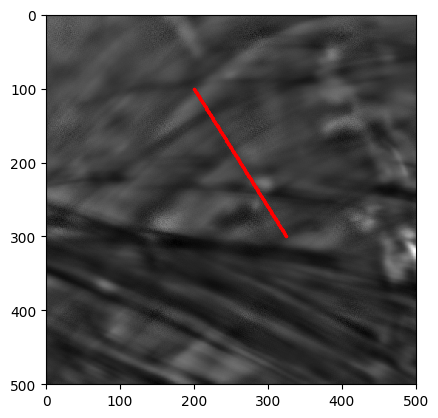

In [184]:
framesmall = img_file[1].data[0][1000:1500,1000:1500]
fig,ax=plt.subplots()
ax.pcolormesh(framesmall,cmap='grey')
ax.invert_yaxis()
ax.scatter(np.linspace(200,325,200),np.linspace(100,300,200),2,c='red')
#ax.set_xlim([390,440])
#ax.set_ylim([300,170])
ax.set_aspect('equal')

In [186]:
xrange =  np.linspace(200,325,200)
yrange = np.linspace(100,300,200)
values = []
pixdist = []
lencut = np.sqrt(125**2+200**2)
for i in range(200):
    values.append(framesmall[int(yrange[i]),int(xrange[i])])

pixdist = np.linspace(0,lencut,200)

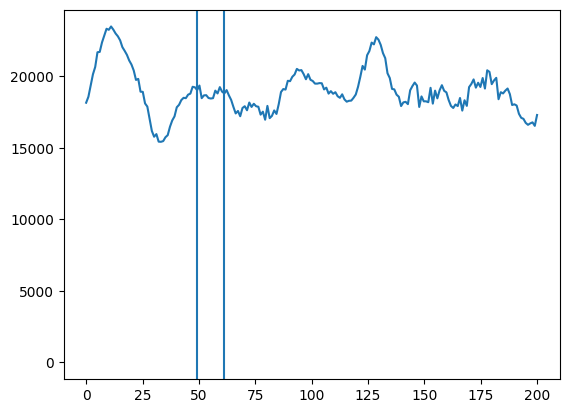

In [248]:
fig,ax=plt.subplots()
ax.plot(np.linspace(0,len(values),200),values,1)
st = 49
end = 61
ax.axvline(st)
ax.axvline(end)



In [246]:
covariance1

array([[ 7.57515393e+04, -6.99872558e+00,  2.81617482e+02,
        -6.88383155e+04],
       [-6.99872558e+00,  4.65976815e-01, -3.51712062e-02,
         8.08932447e+00],
       [ 2.81617482e+02, -3.51712062e-02,  2.55321425e+00,
        -4.19933152e+02],
       [-6.88383155e+04,  8.08932447e+00, -4.19933152e+02,
         8.52157019e+04]])

 MINIMA loc---> 64.20698246588744
FWHM = 84.39447535676669 +\- 1.5978780453903756 km


<>:18: SyntaxWarning: invalid escape sequence '\-'
<>:18: SyntaxWarning: invalid escape sequence '\-'
/var/folders/_1/p_v_pt7912z2pqq5nrvwvhlc0000gn/T/ipykernel_39152/2051871811.py:18: SyntaxWarning: invalid escape sequence '\-'
  print('FWHM = {} +\- {} km'.format(size,error))


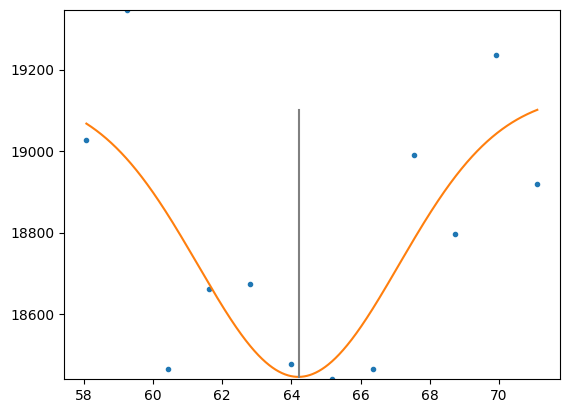

In [242]:
xdata = pixdist[st:end]
ydata = values[st:end]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [float(i)/max(ydata)-1 for i in ydata]
xfit1, yfit1, params1, covariance1, w0_1 = fitfeature(xdata,ydata,-1,10,19000)
# g_init = models.Gaussian1D(amplitude=-1, mean=42, stddev=5)
# fit_g = fitting.LevMarLSQFitter()
# g = fit_g(g_init, xdata, ynorm)

#parameters are: amplitude, center, sigma, baseline
sig = np.abs(params1[2])
fwhm = 2*np.sqrt(2*np.log(2))*sig
size = 0.017*727*fwhm
error = np.sqrt(covariance1[2,2])
print('FWHM = {} +\- {} km'.format(size,error))

In [17]:
# the following had been for first frame

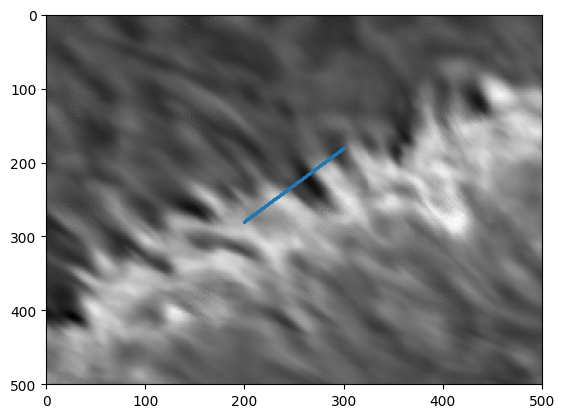

In [18]:
framesmall = img_file[1].data[0][250:750,1000:1500]
fig,ax=plt.subplots()
ax.pcolormesh(framesmall,cmap='grey')
ax.invert_yaxis()
ax.scatter(np.linspace(200,300,101),np.linspace(280,180,101),2)

In [349]:
xrange =  np.linspace(200,330,131)
yrange = np.linspace(310,180,131)
values = []
pixdist = []
for i in range(130):
    values.append(framesmall[int(xrange[i]),int(yrange[i])])
    pixdist.append(i*np.sqrt(2))


    

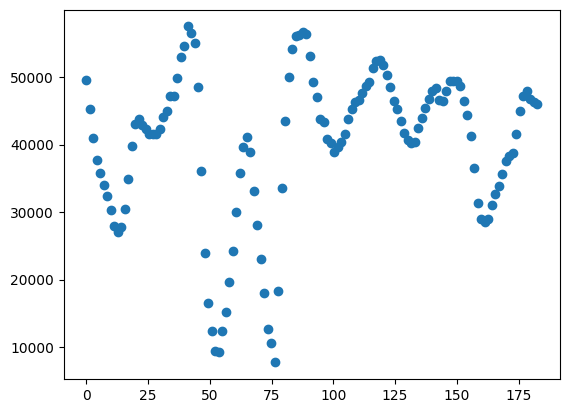

In [351]:
fig,ax=plt.subplots()
ax.scatter(pixdist,values)


In [353]:


xdata = pixdist[38:54]
ydata = values[38:54]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [float(i)/max(ydata) for i in ydata]

g_init = models.Gaussian1D(amplitude=1., mean=67, stddev=10)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xdata, ynorm)



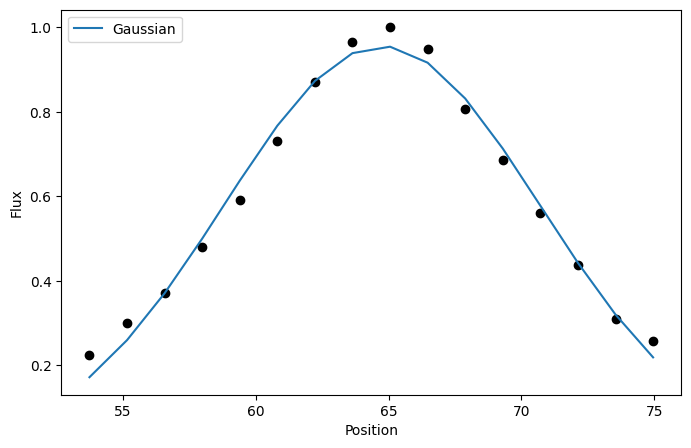

In [355]:
plt.figure(figsize=(8,5))
plt.plot(xdata, ynorm, 'ko')
plt.plot(xdata, g(xdata), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

In [357]:
size = 0.017*727*g.fwhm
size

173.0373818859538

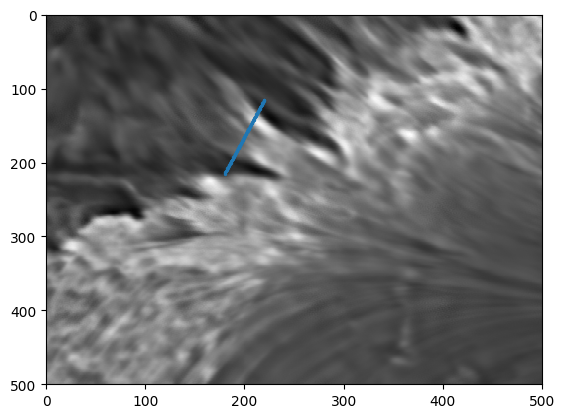

In [359]:
framesmall = img_file[1].data[0][500:1000,750:1250]
fig,ax=plt.subplots()
ax.pcolormesh(framesmall,cmap='grey')
ax.invert_yaxis()
ax.scatter(np.linspace(180,220,101),np.linspace(215,115,101),2)

In [361]:
xrange =  np.linspace(180,220,101)
yrange = np.linspace(215,115,101)
values = []
pixdist = []
lencut = np.sqrt(41**2+100**2)
for i in range(100):
    values.append(framesmall[int(xrange[i]),int(yrange[i])])

pixdist = np.linspace(0,lencut,100)



In [363]:
lencut

108.07867504739313

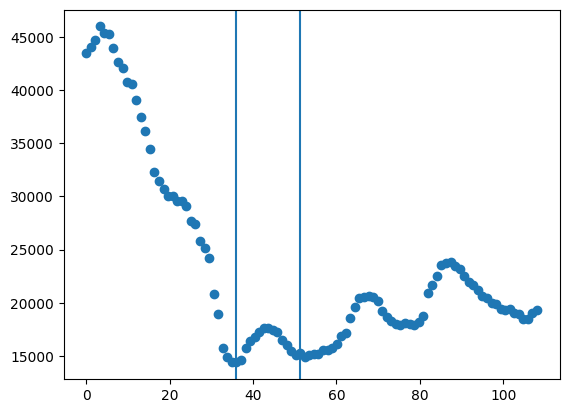

In [365]:
fig,ax=plt.subplots()
ax.scatter(pixdist,values)
ax.axvline(pixdist[33])
ax.axvline(pixdist[47])

In [367]:
xdata = pixdist[33:47]
ydata = values[33:47]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [float(i)/max(ydata) for i in ydata]

g_init = models.Gaussian1D(amplitude=1., mean=45, stddev=10)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xdata, ynorm)

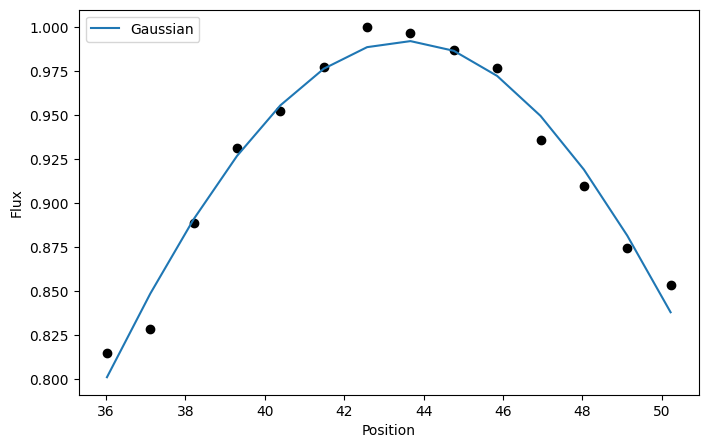

In [369]:
plt.figure(figsize=(8,5))
plt.plot(xdata, ynorm, 'ko')
plt.plot(xdata, g(xdata), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

In [371]:
size = 0.017*727*g.fwhm
size

334.5064488220516

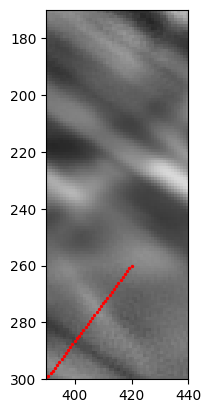

In [463]:
framesmall = img_file[1].data[0][1500:2000,1500:2000]
fig,ax=plt.subplots()
ax.pcolormesh(framesmall,cmap='grey')
ax.invert_yaxis()
ax.scatter(np.linspace(390,420,40),np.linspace(300,260,40),2,c='red')
ax.set_xlim([390,440])
ax.set_ylim([300,170])
ax.set_aspect('equal')

In [473]:
xrange =  np.linspace(390,420,40)
yrange = np.linspace(300,260,40)
values = []
pixdist = []
lencut = np.sqrt(30**2+40**2)
for i in range(40):
    values.append(framesmall[int(xrange[i]),int(yrange[i])])

pixdist = np.linspace(0,lencut,40)

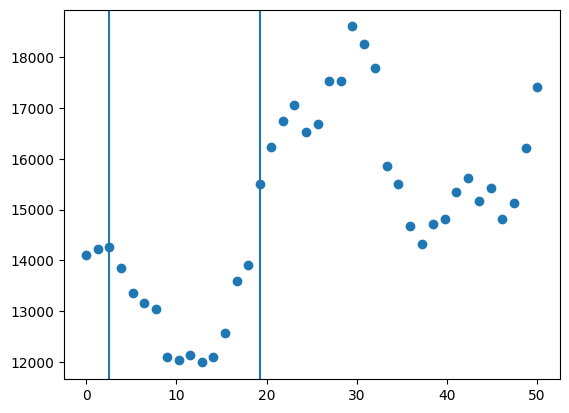

In [485]:
fig,ax=plt.subplots()
ax.scatter(pixdist,values)
ax.axvline(pixdist[2])
ax.axvline(pixdist[15])


In [512]:
xdata = pixdist[2:15]
ydata = values[2:15]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [float(i)/max(ydata)-1 for i in ydata]

g_init = models.Gaussian1D(amplitude=-1, mean=10, stddev=10)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xdata, ynorm)

In [514]:
g

<Gaussian1D(amplitude=-0.16733153, mean=11.42850279, stddev=3.88484819)>

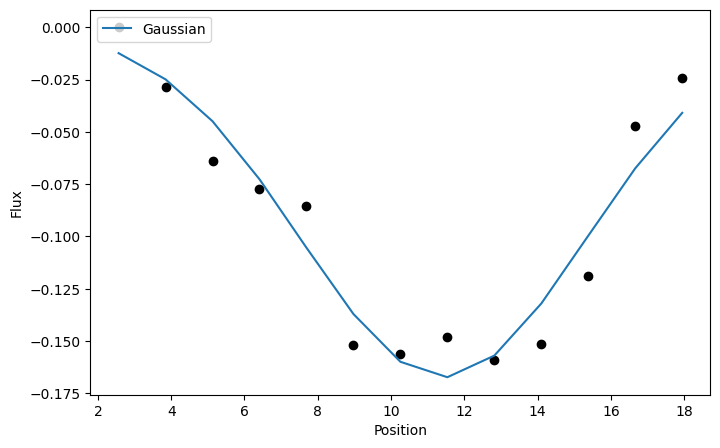

In [516]:
plt.figure(figsize=(8,5))
plt.plot(xdata, ynorm, 'ko')
plt.plot(xdata, g(xdata), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

In [518]:
size = 0.017*727*g.fwhm
size

113.0615952446757

In [72]:
from scipy.optimize import curve_fit

In [96]:
def gaussian_for_calib(x, A, mu, sigma, baseline):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))+ baseline

def fitfeature(xdata, ydata, amp,sig,base,plot='True'):
	#Gaussian fit
	params, covariance = curve_fit(gaussian_for_calib, xdata, ydata, p0=[amp, np.mean(xdata), sig, base])
	a,b,c,d = params
	xfit  = np.linspace(xdata[0],xdata[-1], 1000)
	yfit = gaussian_for_calib(xfit, a,b,c,d)

	w0 = xfit[np.argmin(yfit)]
	print(' MINIMA loc--->',w0)
	
	if plot=='True':
		plt.plot(xdata, ydata, '.')
		plt.plot(xfit, yfit)
		plt.plot([w0,w0], [yfit.min()-0.1, yfit.max()], color='gray')
		plt.ylim(ydata.min()-0.03, ydata.max()+0.03)

	return xfit, yfit, params, covariance, w0

In [645]:
# this was for 16th frame

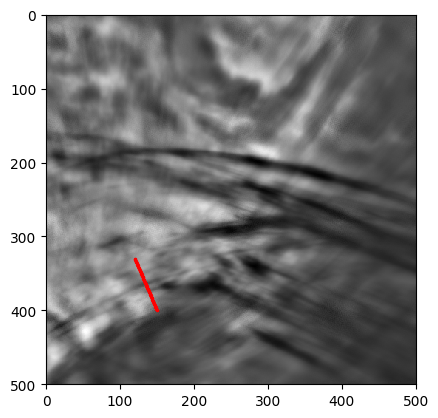

In [36]:
framesmall = img_file[1].data[0][1000:1500,500:1000]
fig,ax=plt.subplots()
ax.pcolormesh(framesmall,cmap='grey')
ax.invert_yaxis()
ax.scatter(np.linspace(120,150,70),np.linspace(330,400,70),2,c='red')
#ax.set_xlim([390,440])
#ax.set_ylim([300,170])
ax.set_aspect('equal')

In [38]:
xrange =  np.linspace(120,150,70)
yrange = np.linspace(330,400,70)
values = []
pixdist = []
lencut = np.sqrt(30**2+70**2)
for i in range(70):
    values.append(framesmall[int(yrange[i]),int(xrange[i])])

pixdist = np.linspace(0,lencut,70)

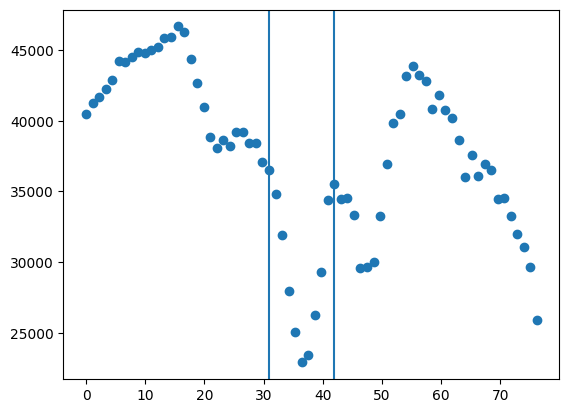

In [152]:
fig,ax=plt.subplots()
ax.scatter(pixdist,values)
ax.axvline(pixdist[28])
ax.axvline(pixdist[38])

xdata = pixdist[23:39]
ydata = values[23:39]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [float(i)/max(ydata)-1 for i in ydata]
xfit1, yfit1, params1, covariance1, w0_1 = fitfeature(xdata,ydata,-1,5,35000)
# g_init = models.Gaussian1D(amplitude=-1, mean=42, stddev=5)
# fit_g = fitting.LevMarLSQFitter()
# g = fit_g(g_init, xdata, ynorm)

#parameters are: amplitude, center, sigma, baseline
sig = np.abs(params1[2])
fwhm = 2*np.sqrt(2*np.log(2))*sig
fwhm

 MINIMA loc---> 36.70499689878441


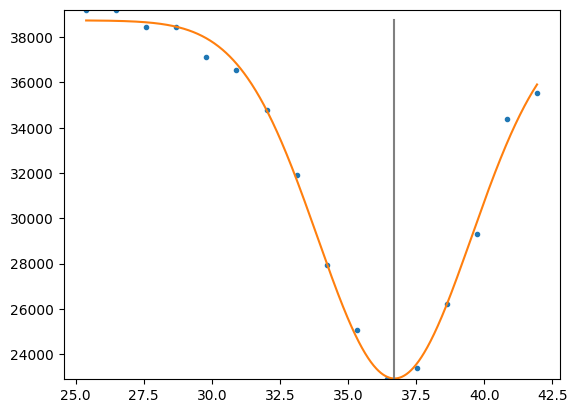

In [154]:
# using other method


6.646588678513535

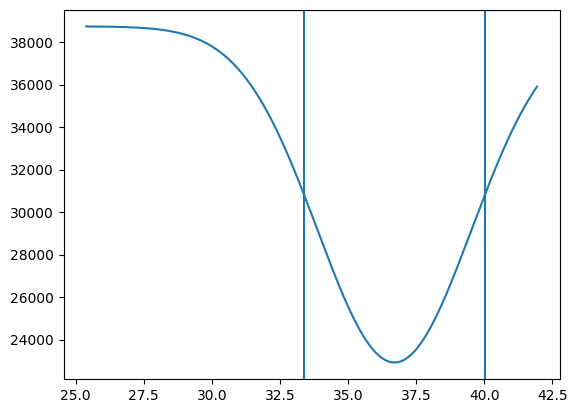

In [162]:
fig,ax=plt.subplots()
ax.plot(xfit1,yfit1)
ax.axvline(params1[1]-(fwhm/2))
ax.axvline(params1[1]+(fwhm/2))

In [158]:
size = 0.017*727*fwhm
size

82.14518947774879

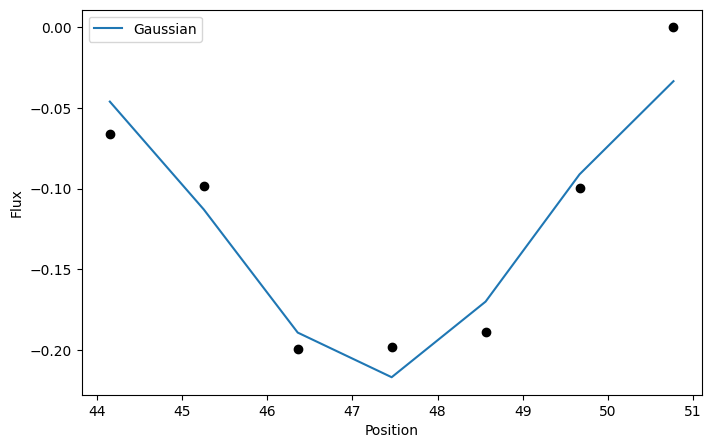

In [66]:
plt.figure(figsize=(8,5))
plt.plot(xdata, ynorm, 'ko')
plt.plot(xdata, g(xdata), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

In [116]:
xdata = pixdist[40:47]
ydata = values[40:47]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [float(i)/max(ydata)-1 for i in ydata]

g_init = models.Gaussian1D(amplitude=-1, mean=37, stddev=5)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xdata, ynorm)

 MINIMA loc---> 47.25842927423407


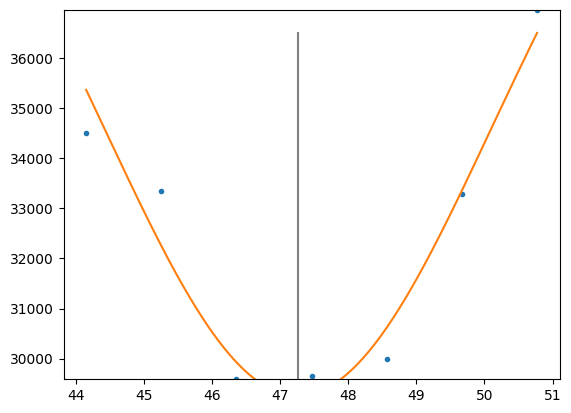

In [118]:
xfit1, yfit1, params1, covariance1, w0_1 = fitfeature(xdata,ydata,-1,5,35000)

In [122]:
#parameters are: amplitude, center, sigma, baseline
sig = np.abs(params1[2])
fwhm = 2*np.sqrt(2*np.log(2))*sig
fwhm
size = 0.017*727*fwhm
size

82.48541575522584

there we go. Errorbars? 

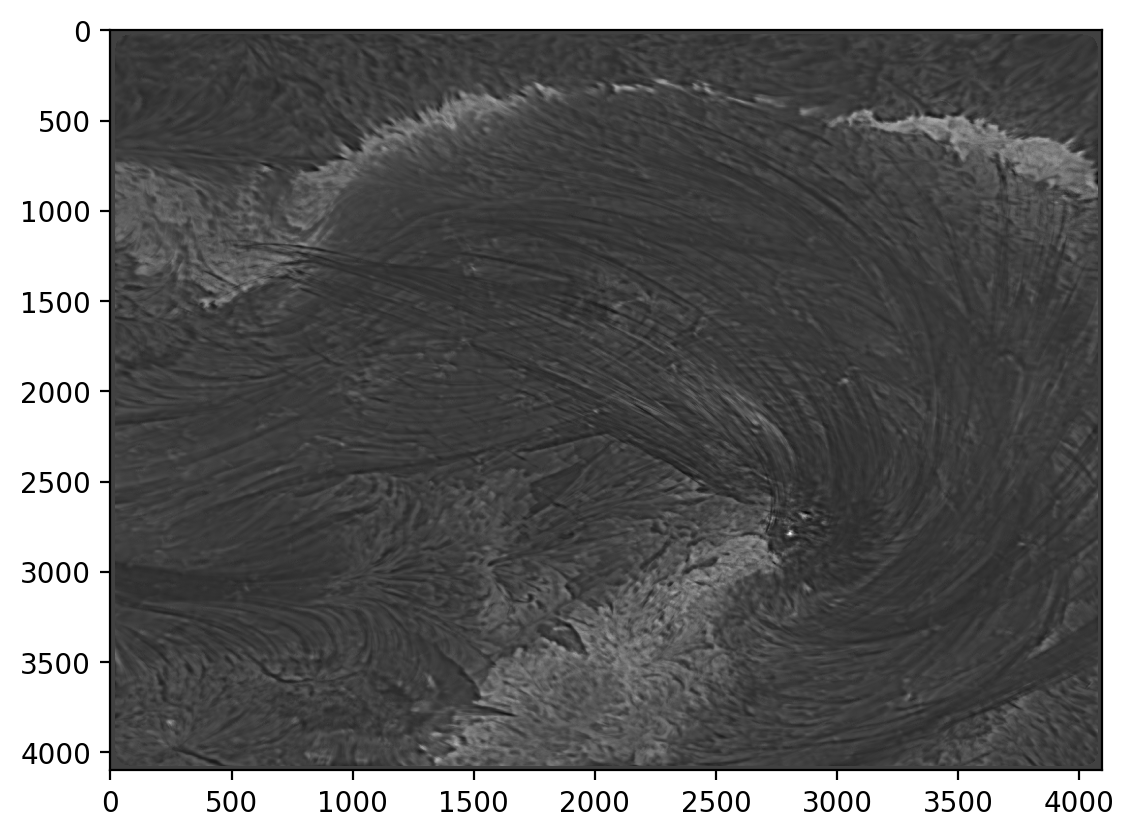

In [647]:
# ribbon finger

img_file = fits.open(path+folder_vbi+'/'+dir_list[15])
frame = img_file[1].data[0]
fig,ax=plt.subplots(dpi=200)
ax.pcolormesh(frame,cmap='grey')
ax.invert_yaxis()

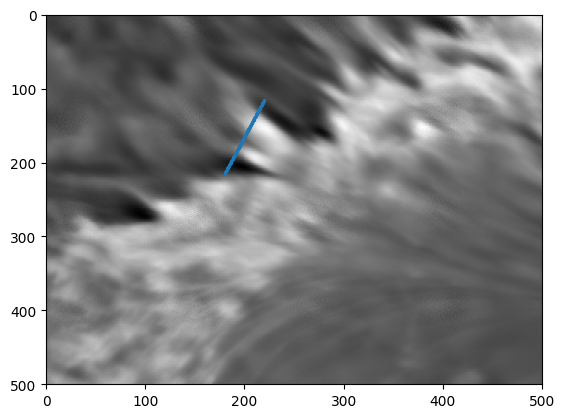

In [651]:
framesmall = img_file[1].data[0][500:1000,750:1250]
fig,ax=plt.subplots()
ax.pcolormesh(framesmall,cmap='grey')
ax.invert_yaxis()
ax.scatter(np.linspace(180,220,101),np.linspace(215,115,101),2)

In [653]:
xrange =  np.linspace(180,220,101)
yrange = np.linspace(215,115,101)
values = []
pixdist = []
lencut = np.sqrt(41**2+100**2)
for i in range(100):
    values.append(framesmall[int(xrange[i]),int(yrange[i])])

pixdist = np.linspace(0,lencut,100)

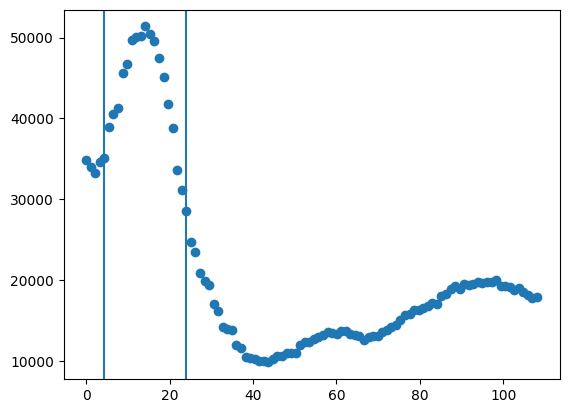

In [659]:
fig,ax=plt.subplots()
ax.scatter(pixdist,values)
ax.axvline(pixdist[4])
ax.axvline(pixdist[22])

In [669]:
xdata = pixdist[4:22]
ydata = values[4:22]

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [float(i)/max(ydata) for i in ydata]

g_init = models.Gaussian1D(amplitude=1., mean=10, stddev=10)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xdata, ynorm)

In [671]:
size = 0.017*727*g.fwhm
size

288.9681077474073

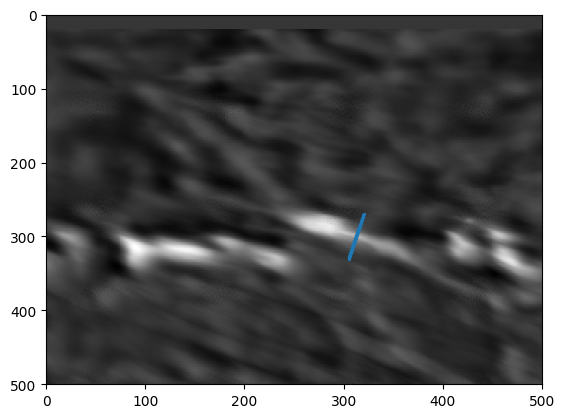

In [695]:
framesmall = img_file[1].data[0][0:500,2000:2500]
fig,ax=plt.subplots()
ax.pcolormesh(framesmall,cmap='grey')
ax.invert_yaxis()
ax.scatter(np.linspace(305,320,60),np.linspace(330,270,60),2)

In [701]:
xrange =  np.linspace(305,320,60)
yrange = np.linspace(330,270,60)
values = []
pixdist = []
lencut = np.sqrt(15**2+60**2)
for i in range(60):
    values.append(framesmall[int(yrange[i]),int(xrange[i])])

pixdist = np.linspace(0,lencut,60)

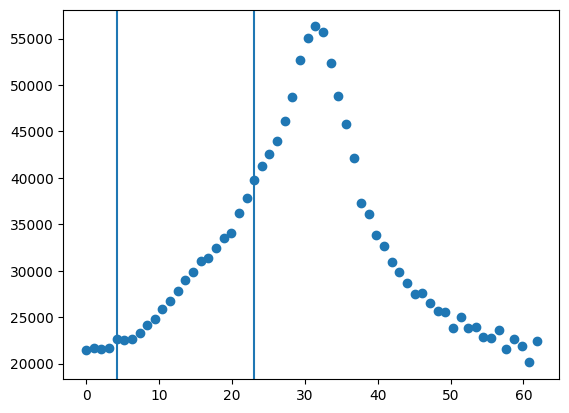

In [703]:
fig,ax=plt.subplots()
ax.scatter(pixdist,values)


In [709]:
xdata = pixdist
ydata = values

xdata = np.asarray(xdata)
ydata = np.asarray(ydata)

ynorm = [float(i)/max(ydata) for i in ydata]

g_init = models.Gaussian1D(amplitude=1., mean=30, stddev=10)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, xdata, ynorm)

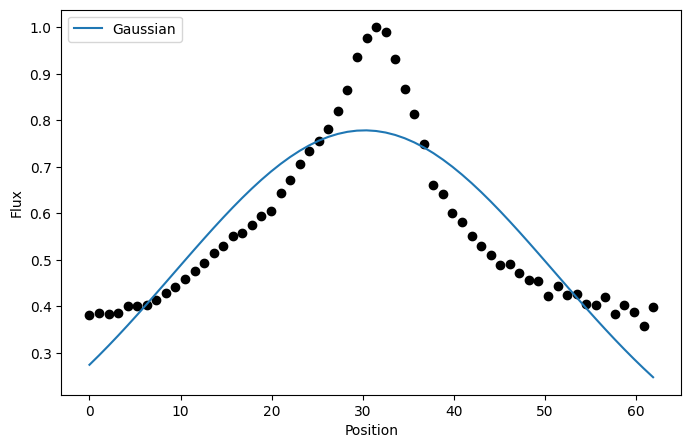

In [712]:
plt.figure(figsize=(8,5))
plt.plot(xdata, ynorm, 'ko')
plt.plot(xdata, g(xdata), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

fwhm looks to be like 20 though